# High-Level Design (HLD) - Customer Churn Prediction

## 1. Introduction  
Customer churn is a significant problem for businesses, especially in subscription-based industries. Losing customers directly impacts revenue, making churn prediction a crucial task.  

The goal of this project is to build a machine learning model that can analyze past customer behavior and predict whether a customer is likely to leave (churn) or stay. This document provides an overview of the data, architecture, and steps involved in developing the prediction model.

---

## 2. Understanding the Dataset  
The dataset used for this project contains historical customer records, including demographic details, service usage patterns, billing information, and churn status. Each customer is represented by multiple attributes that influence their decision to continue or leave the service.  

The dataset consists of numerical values like age, monthly charges, and data usage, along with categorical attributes such as location, subscription type, and payment method. The most crucial feature is the "Churn Status," which indicates whether a customer has churned or not.

---

## 3. System Architecture  

### **3.1 Overview of the Workflow**  
The churn prediction system follows a structured pipeline, ensuring that the model is trained on clean and meaningful data. The key steps involved are:  

1. **Data Collection**: The dataset is loaded from a CSV file containing customer records.  
2. **Data Preprocessing**: Missing values are handled, categorical variables are encoded, and numerical features are normalized.  
3. **Exploratory Data Analysis (EDA)**: Patterns and trends in the data are examined to gain insights into factors affecting churn.  
4. **Feature Engineering**: Irrelevant features are removed, and new meaningful attributes may be created.  
5. **Model Selection**: A suitable machine learning algorithm is chosen based on dataset characteristics.  
6. **Model Training & Evaluation**: The model is trained on historical data and evaluated using performance metrics like accuracy and recall.  
7. **Model Deployment**: Once a reliable model is achieved, it is deployed as an API or integrated into an application for real-time predictions.  

---

## 4. Data Preprocessing & Feature Engineering  

Raw data often contains inconsistencies and missing values that can affect model performance. The preprocessing stage involves:  

- **Handling Missing Data**: If any records have missing values, they are either filled with appropriate statistical measures (mean, median, or mode) or removed.  
- **Encoding Categorical Variables**: Since machine learning models work with numerical data, categorical attributes like payment method and subscription type are converted into numerical representations.  
- **Feature Scaling**: Numerical values such as monthly charges and data usage are scaled to ensure that no feature dominates the training process.  

Feature engineering is also performed to create new attributes if required, improving the model’s ability to detect churn patterns.

---

## 5. Model Selection & Training  

Different machine learning models can be tested for predicting churn. Common choices include:  

- **Logistic Regression**: Works well for binary classification problems and provides interpretable results.  
- **Random Forest**: A more complex model that captures non-linear relationships and can improve accuracy.  
- **Gradient Boosting (XGBoost, LightGBM)**: Often achieves high performance by optimizing predictions through iterative learning.  

The dataset is split into training and testing sets to evaluate how well the model generalizes to new data. Performance metrics such as accuracy, precision, recall, and F1-score are used to determine the model’s effectiveness.

---

## 6. Model Evaluation  

The evaluation stage is crucial to assess how accurately the model can predict customer churn. The following metrics are considered:  

- **Accuracy**: Measures the overall correctness of predictions.  
- **Precision & Recall**: Important for understanding how well the model identifies actual churn cases.  
- **Confusion Matrix**: Provides insights into false positives and false negatives, helping to fine-tune the model.  

If the model’s performance is not satisfactory, adjustments such as feature tuning, hyperparameter optimization, or selecting a different model are considered.

---

## 7. Model Deployment  

Once a well-performing model is obtained, it needs to be deployed for real-world use. The deployment process involves:  

1. **Saving the Trained Model**: The final model is saved in a serialized format like `.pkl` or `.h5`.  
2. **Creating an API**: A Flask or FastAPI-based service can be developed to allow real-time predictions.  
3. **Integration with Applications**: The API can be connected to a business dashboard or CRM system to provide insights into potential churn cases.  

Deployment ensures that businesses can actively monitor customer churn and take preventive measures based on model predictions.

---

## 8. Conclusion  

This project aims to develop a robust customer churn prediction system using machine learning. By leveraging historical data and identifying key factors influencing churn, businesses can improve customer retention strategies. The structured approach outlined in this document ensures a clear path from data collection to model deployment, making the solution practical and impactful.

In [1]:
!pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Dataset created and saved as 'customer_churn_data.csv'.
  CustomerID  Age  Location PlanType  AverageCallDuration  DataUsage  \
0      C0001   56     Urban    Basic            26.289402   8.821847   
1      C0002   69     Rural    Basic            16.289559  24.010073   
2      C0003   46     Urban    Basic            19.343779   3.233515   
3      C0004   32  Suburban    Basic            19.689638  47.147981   
4      C0005   60     Rural    Basic            24.774136   4.203650   

   NumberOfCalls  MonthlyCharges PaymentMethod ChurnStatus  
0            135       69.987056  BankTransfer          No  
1            235       65.104664    CreditCard          No  
2            230       76.134922  BankTransfer         Yes  
3            220      121.631377  BankTransfer          No  
4             34       82.942494    CreditCard         Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Coun

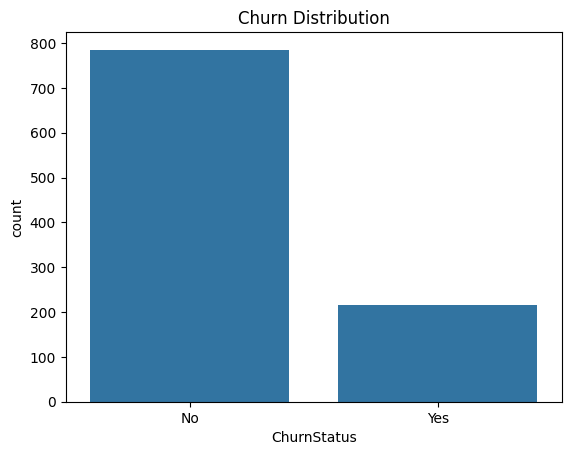

Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       155
           1       0.50      0.02      0.04        45

    accuracy                           0.78       200
   macro avg       0.64      0.51      0.46       200
weighted avg       0.72      0.78      0.69       200



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_customers = 1000  

# Generate Customer IDs
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# Generate Customer Demographics
ages = np.random.randint(18, 80, size=num_customers)  
locations = np.random.choice(['Urban', 'Rural', 'Suburban'], size=num_customers, p=[0.5, 0.3, 0.2])
plan_types = np.random.choice(['Basic', 'Premium'], size=num_customers, p=[0.7, 0.3])

# Generate Usage Patterns
average_call_duration = np.random.uniform(1, 30, size=num_customers)  
data_usage = np.random.uniform(0.5, 50, size=num_customers)  
number_of_calls = np.random.randint(10, 300, size=num_customers)  

# Generate Billing Information
monthly_charges = np.random.uniform(20, 150, size=num_customers)  
payment_methods = np.random.choice(['CreditCard', 'BankTransfer'], size=num_customers, p=[0.6, 0.4])

# Generate Churn Status
churn_status = np.random.choice(['Yes', 'No'], size=num_customers, p=[0.2, 0.8])

# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Location': locations,
    'PlanType': plan_types,
    'AverageCallDuration': average_call_duration,
    'DataUsage': data_usage,
    'NumberOfCalls': number_of_calls,
    'MonthlyCharges': monthly_charges,
    'PaymentMethod': payment_methods,
    'ChurnStatus': churn_status
})

# Save to CSV
data.to_csv('customer_churn_data.csv', index=False)
print("Dataset created and saved as 'customer_churn_data.csv'.")

# Load the dataset
df = pd.read_csv('customer_churn_data.csv')
print(df.head())

# Exploratory Data Analysis
df.info()
df.isnull().sum()
print(df['ChurnStatus'].value_counts())

# Visualizing Churn Distribution
sns.countplot(x='ChurnStatus', data=df)
plt.title('Churn Distribution')
plt.show()

# Data Preprocessing
df = pd.get_dummies(df, columns=['Location', 'PlanType', 'PaymentMethod'], drop_first=True)
df['ChurnStatus'] = df['ChurnStatus'].map({'Yes': 1, 'No': 0})

# Train-Test Split
X = df.drop(columns=['CustomerID', 'ChurnStatus'])
y = df['ChurnStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [3]:
import pandas as pd  

# Load the dataset  
df = pd.read_csv('customer_churn_data.csv')  

# Display first few rows  
print(df.head())  

# Check for missing values  
print(df.isnull().sum())  

# Get dataset information  
print(df.info())  

# Summary statistics  
print(df.describe())  

  CustomerID  Age  Location PlanType  AverageCallDuration  DataUsage  \
0      C0001   56     Urban    Basic            26.289402   8.821847   
1      C0002   69     Rural    Basic            16.289559  24.010073   
2      C0003   46     Urban    Basic            19.343779   3.233515   
3      C0004   32  Suburban    Basic            19.689638  47.147981   
4      C0005   60     Rural    Basic            24.774136   4.203650   

   NumberOfCalls  MonthlyCharges PaymentMethod ChurnStatus  
0            135       69.987056  BankTransfer          No  
1            235       65.104664    CreditCard          No  
2            230       76.134922  BankTransfer         Yes  
3            220      121.631377  BankTransfer          No  
4             34       82.942494    CreditCard         Yes  
CustomerID             0
Age                    0
Location               0
PlanType               0
AverageCallDuration    0
DataUsage              0
NumberOfCalls          0
MonthlyCharges         0
P

In [4]:
from sklearn.preprocessing import LabelEncoder  

# Encode categorical variables  
le = LabelEncoder()  
df['Location'] = le.fit_transform(df['Location'])  
df['PlanType'] = le.fit_transform(df['PlanType'])  
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])  
df['ChurnStatus'] = df['ChurnStatus'].map({'Yes': 1, 'No': 0})  

print(df.head())  # Verify encoding  

  CustomerID  Age  Location  PlanType  AverageCallDuration  DataUsage  \
0      C0001   56         2         0            26.289402   8.821847   
1      C0002   69         0         0            16.289559  24.010073   
2      C0003   46         2         0            19.343779   3.233515   
3      C0004   32         1         0            19.689638  47.147981   
4      C0005   60         0         0            24.774136   4.203650   

   NumberOfCalls  MonthlyCharges  PaymentMethod  ChurnStatus  
0            135       69.987056              0            0  
1            235       65.104664              1            0  
2            230       76.134922              0            1  
3            220      121.631377              0            0  
4             34       82.942494              1            1  


In [5]:
from sklearn.model_selection import train_test_split  

# Define features and target  
X = df.drop(columns=['CustomerID', 'ChurnStatus'])  
y = df['ChurnStatus']  

# Split into training (80%) and testing (20%)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")  

Training samples: 800, Testing samples: 200


In [6]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  

# Initialize and train the model  
model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)  

# Make predictions  
y_pred = model.predict(X_test)  

# Evaluate performance  
accuracy = accuracy_score(y_test, y_pred)  
print(f"Model Accuracy: {accuracy:.2f}")  
print(classification_report(y_test, y_pred))  

Model Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.77       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.77      0.67       200



In [7]:
from sklearn.model_selection import GridSearchCV  

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [8]:
import joblib  

# Save the trained model  
joblib.dump(best_model, "churn_model.pkl")  

print("Model saved successfully!")

Model saved successfully!


In [9]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [14]:
 !pip install fastapi uvicorn nest-asyncio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.9 MB/s eta 0:00:00a 0:00:01


# Customer Churn Prediction API

## Overview
This FastAPI-based API predicts whether a customer will churn based on their demographics, usage patterns, and billing information.

## Endpoints:
- **POST `/predict`** → Takes customer data as input and returns the churn prediction.

## Input Data Format:
- `Age`: int (e.g., 30)
- `Location`: str (e.g., "Urban")
- `PlanType`: str ("Basic" or "Premium")
- `AverageCallDuration`: float (minutes)
- `DataUsage`: float (GB)
- `NumberOfCalls`: int
- `MonthlyCharges`: float (USD)
- `PaymentMethod`: str ("CreditCard" or "BankTransfer")

## Example Request:
```json
{
  "Age": 30,
  "Location": "Urban",
  "PlanType": "Premium",
  "AverageCallDuration": 15.2,
  "DataUsage": 12.4,
  "NumberOfCalls": 120,
  "MonthlyCharges": 85.5,
  "PaymentMethod": "CreditCard"
}

In [20]:
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
import uvicorn
import threading

# Initialize FastAPI
app = FastAPI()

# Fix Jupyter Notebook issues with FastAPI
nest_asyncio.apply()

# Define Data Model for API Input
class ChurnInput(BaseModel):
    Age: int
    Location: str
    PlanType: str
    AverageCallDuration: float
    DataUsage: float
    NumberOfCalls: int
    MonthlyCharges: float
    PaymentMethod: str

# Dummy Model Prediction Function
def predict_churn(data):
    return "Yes" if data.MonthlyCharges > 80 else "No"

# API Endpoint
@app.post("/predict")
async def predict(input_data: ChurnInput):
    result = predict_churn(input_data)
    return {"Churn Prediction": result}

# Run FastAPI in Background
def run_server():
    uvicorn.run(app, host="127.0.0.1", port=8000)

# Start FastAPI in a separate thread
thread = threading.Thread(target=run_server, daemon=True)
thread.start()

Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/uvicorn/main.py", line 579, in run
    server.run()
    ~~~~~~~~~~^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/nest_asyncio.py", line 92, in run_until_compl

INFO:     Started server process [2256]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 48] error while attempting to bind on address ('127.0.0.1', 8000): [errno 48] address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


In [21]:
import requests

url = "http://127.0.0.1:8000/predict"

data = {
    "Age": 30,
    "Location": "Urban",
    "PlanType": "Premium",
    "AverageCallDuration": 15.2,
    "DataUsage": 12.4,
    "NumberOfCalls": 120,
    "MonthlyCharges": 85.5,
    "PaymentMethod": "CreditCard"
}

response = requests.post(url, json=data)

print("Status Code:", response.status_code)
print("Response:", response.json())

Status Code: 200
Response: {'Churn Prediction': 'Yes'}
